#### We're interested in how much money customers spend vs length of membership
#### Can we predict how much they'll spend if we know how long they've been a member? 


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('LSE_DA301_Week_1_files/Data/loyalty_club.csv')
data_df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
# choose our dep and ind vars:
x = data_df['Length of Membership']
y = data_df['Yearly Amount Spent']


In [18]:
z = pd.concat([x, y], axis=1).reset_index()
z = z.drop(['index'], axis=1)
z = z.rename(columns={'Length of Membership': 'x', 'Yearly Amount Spent': 'y'})
z

,x,y
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


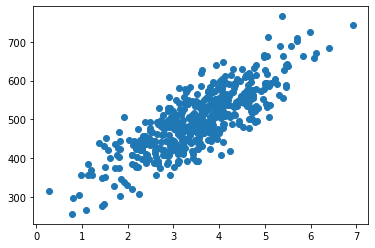

In [21]:
# visualise
plt.scatter(z['x'], z['y'])


In [23]:
# ols test
f = 'y ~ x'
test = ols(f, data=data_df).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     943.9
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          4.81e-117
Time:                        19:36:02   Log-Likelihood:                -2629.9
No. Observations:                 500   AIC:                             5264.
Df Residuals:                     498   BIC:                             5272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    272.3998      7.675     35.492      0.000     257.320     287.479
x             64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# look up the coefficients (m and c) and use in this equation:
y_pred = 64.2187 * z['x'] + 272.3998
y_pred

0      534.580390
1      443.480612
2      535.988229
3      472.773625
4      557.935940
          ...    
495    512.999846
496    502.079645
497    590.813099
498    422.445808
499    448.048192
Name: x, Length: 500, dtype: float64

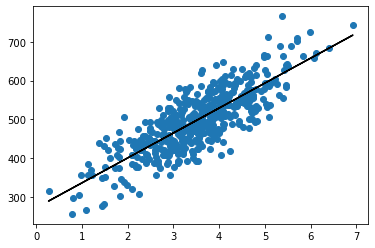

In [29]:
plt.scatter(z['x'], z['y'])
plt.plot(x, y_pred, color='black')